In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


PROBLEM STATEMENT : 

Understanding the data and providing  insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

# Cleaning Null values

### First lets clean rows having less null values

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['duration'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: duration, Length: 8807, dtype: bool

In [ ]:
# lets clean duration null values because there are only 3 null values
df[df['duration'].isna()]

In [ ]:

#as by mistake duration has been entered into the rating for 3 movies , so  lets copy those into duration
#as there only 3 columns lets manually copy and change rating to unavilable

In [ ]:
df.loc[5541,'duration']= df.loc[5541,'rating']
df.loc[5794,'duration']= df.loc[5794,'rating']
df.loc[5813,'duration']= df.loc[5813,'rating']

In [ ]:
df[ df['director'] == 'Louis C.K.']

In [ ]:
df.loc[ df['director'] == 'Louis C.K.', 'rating'] = 'unavailable'

In [ ]:
df.loc[ df['director'] == 'Louis C.K.']

In [ ]:
df.loc[df['rating'].isna() , 'rating'] = 'unavailable'

In [ ]:
#as rating has only 4 columns with Null , lets manually enter the rating for those titiles by seraching in net

In [ ]:
df.loc[df['rating'] == 'unavailable']

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['date_added'].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#lets convert date_added to date_time format
df['date_added']= pd.to_datetime(df['date_added'])

In [ ]:
#nulls in date_added
df.loc[df.date_added.isna()]

In [ ]:
# for nulls in date added , lets use most latest  data_added value in the null value place
#most frequent date_latest is
df['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [ ]:
#lets add the most frequent date in the missing values
df.loc[df.date_added.isna(), 'date_added'] = pd.to_datetime('2021-09-25')

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#now lets update null values of  director , cast, country to unavailable

In [ ]:
df.fillna({'director':'unavailable','cast':'unavailable','country':'unavailable' } , inplace= True)

In [ ]:
df.isna().sum()  # all nulls values are treated accordingly

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Pre-processing - Unnesting data of cast , genre , director , country

In [ ]:
#lets unnest data of cast , genre , director , country

In [ ]:
df['cast'] = df['cast'].str.split(',')

In [ ]:
df['listed_in'] = df['listed_in'].str.split(',')

In [ ]:
df  = df.explode('cast')

In [ ]:
df['cast'] = df['cast'].str.strip()

In [ ]:
df = df.explode('listed_in')

In [ ]:
df['listed_in']=df['listed_in'].str.strip()

In [ ]:
df['director'] = df['director'].str.split(',')
df = df.explode('director')

In [ ]:
df['director'] = df['director'].str.strip()

In [ ]:
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

# Creating Continous Variables

In [ ]:
#lets make contionous variables , converting 90 mins to 90 and 2 seasons to 2 .. and duration column to int type

In [ ]:
def f(x):
    x = str(x)
    y = x.split(' ')
    return int(y[0])

In [ ]:
df['duration'] = df['duration'].apply(f)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  int64         
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 20.0+ MB


# Analysing and Visualizing the processed data

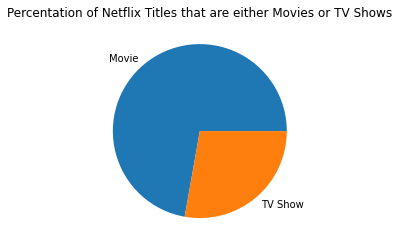

In [ ]:
plt.figure()
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(df.type.value_counts() , labels=df.type.value_counts().index)
plt.show() 

### Netflix has released more Movies than TVshows

In [ ]:
years_movies = pd.DataFrame(df[df['type']=='Movie'].groupby(by=['release_year']).size()).reset_index()[-30:]
years_shows = pd.DataFrame(df[df['type']=='TV Show'].groupby(by=['release_year']).size()).reset_index()[-30:]


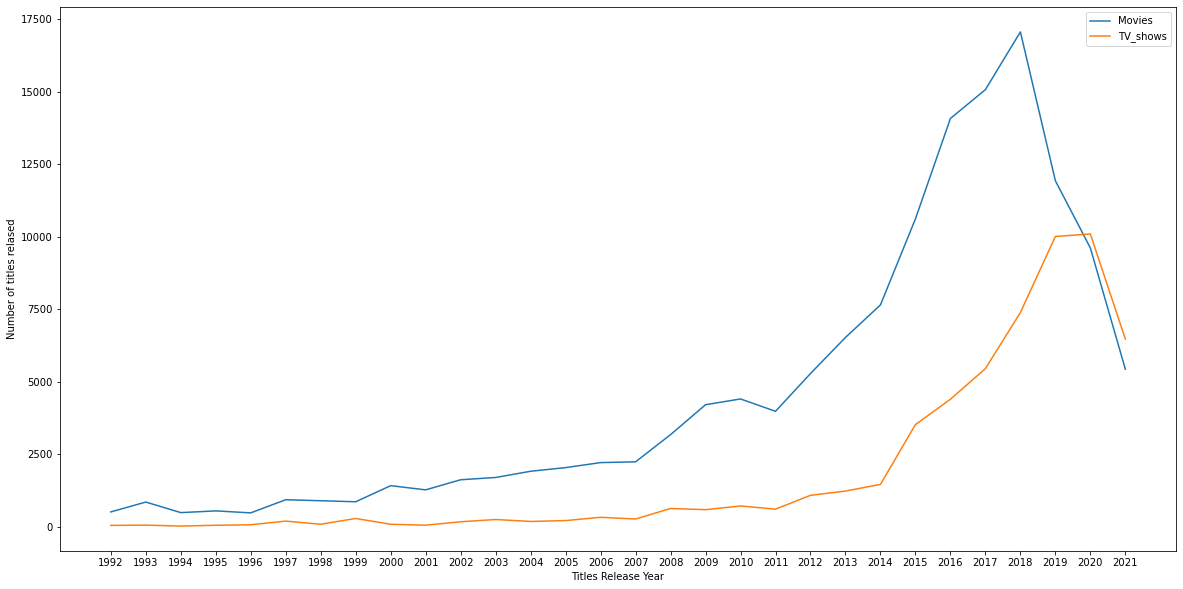

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=years_movies , x='release_year',y=0)
sns.lineplot(data=years_shows , x='release_year',y=0)
ax.set_xticks(np.arange(1992, 2022, 1))
plt.xlabel("Titles Release Year")
plt.ylabel("Number of titles relased")
plt.legend(['Movies','TV_shows'])
plt.show()

### Over the last 30 years , from year 2012 Netflix has increased in the release of  number of movies and TV-shows has increased 
### over past 2 years ,Netflix has more released more TV shows than Movies i.e., Netflix has more focus on TV Shows than movies in recent  years

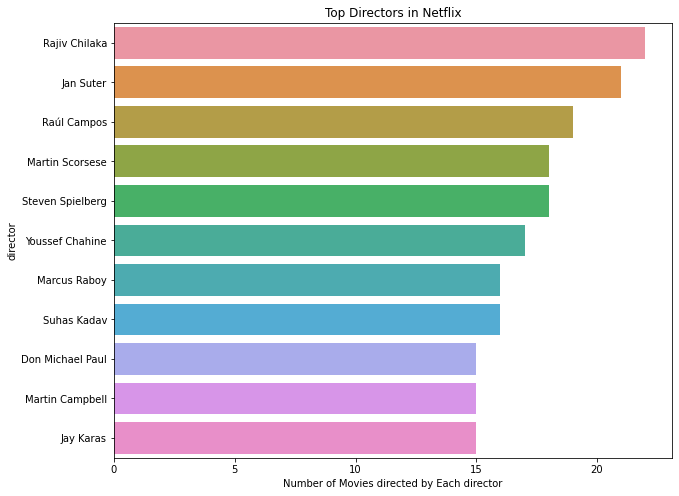

In [ ]:
temp111 = pd.DataFrame(df[df['director']!='unavailable'].groupby(by=['director','title','country']).size())
temp111.drop(columns=0,inplace=True)
top_10_director = temp111.value_counts(subset='director')[:11]
top_10_director  = pd.DataFrame(top_10_director).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_director , y='director',x=0)
plt.xlabel('Number of Movies directed by Each director')
plt.title("Top Directors in Netflix")
plt.show()

## Rajiv Chilaka is the most popular director with more titles in Netflix

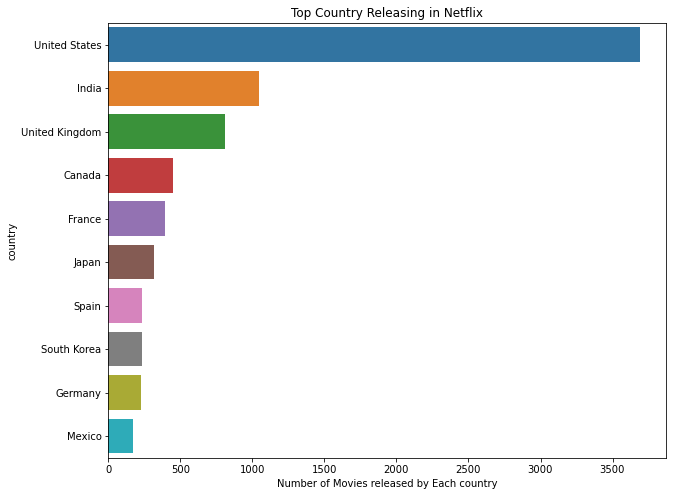

In [ ]:
temp222 = pd.DataFrame(df[df['country']!='unavailable'].groupby(by=['country','title']).size())
top_10_countries = temp222.reset_index().value_counts(subset='country')[:10]
top_10_countries = pd.DataFrame(top_10_countries).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_countries , y='country' , x=0)
plt.xlabel('Number of Movies released by Each country')
plt.title("Top Country Releasing in Netflix")
plt.show()

## United states released more titles in Netflix

## Lets Analyse best month to release TV shows in netflix

In [ ]:
df_tvshows = df[df['type']=='TV Show']
df_tvshows

In [ ]:
def month(x):
    return x.month_name()

In [ ]:
df_tvshows['month_name'] = df_tvshows['date_added'].apply(month)

<ipython-input-59-f37e6b1859ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows['month_name'] = df_tvshows['date_added'].apply(month)


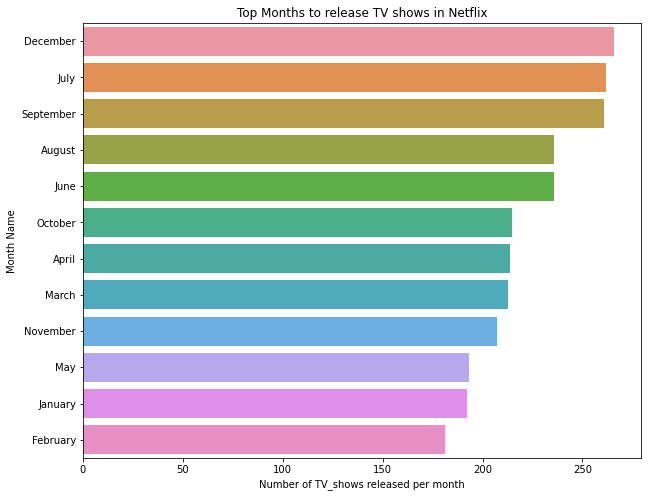

In [ ]:
temp=pd.DataFrame(df_tvshows.groupby(by=['month_name', 'title']).size())
months_TV_shows = pd.DataFrame(temp.value_counts(subset='month_name')).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=months_TV_shows,x=0,y='month_name')
plt.ylabel('Month Name')
plt.xlabel('Number of TV_shows released per month')
plt.title("Top Months to release TV shows in Netflix")
plt.show()

## Best time to release TV shows either at the Decemeber or July

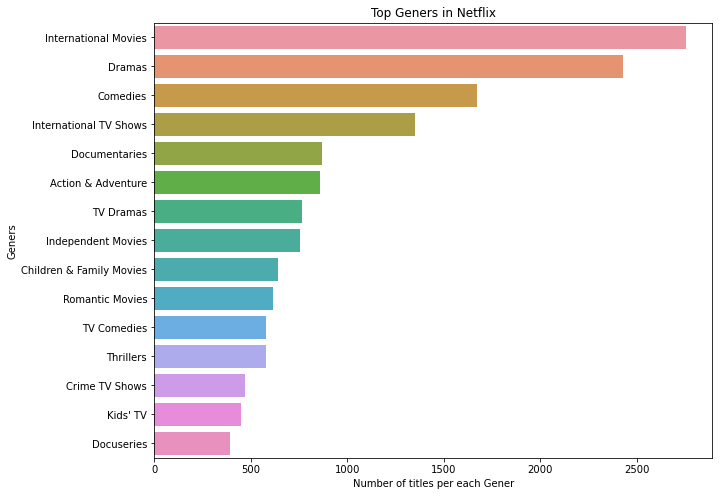

In [ ]:
temp333 = pd.DataFrame(df.groupby(by=['listed_in','title']).size())
temp333.drop(columns=0,inplace=True)
top_genre = pd.DataFrame(temp333.value_counts(subset='listed_in')).reset_index()[:15]
plt.figure(figsize=(10,8))
sns.barplot(data=top_genre,x=0,y='listed_in')
plt.ylabel('Geners')
plt.xlabel('Number of titles per each Gener')
plt.title("Top Geners in Netflix")
plt.show()

## Netflix has released more number of titles from the genre of 'International Movies'

In [ ]:
temp444 = pd.DataFrame(df[df['country']!='unavailable'].groupby(by=['country','title','listed_in']).size()).reset_index()

### lets Analyse the genres across the top5 countries releasing movies in netflix

In [ ]:
temp_India = temp444[temp444['country']=='India']
temp_US = temp444[temp444['country']=='United States']
temp_japan = temp444[temp444['country']=='Japan']
temp_UK = temp444[temp444['country']=='United Kingdom']
temp_France = temp444[temp444['country']=='France']

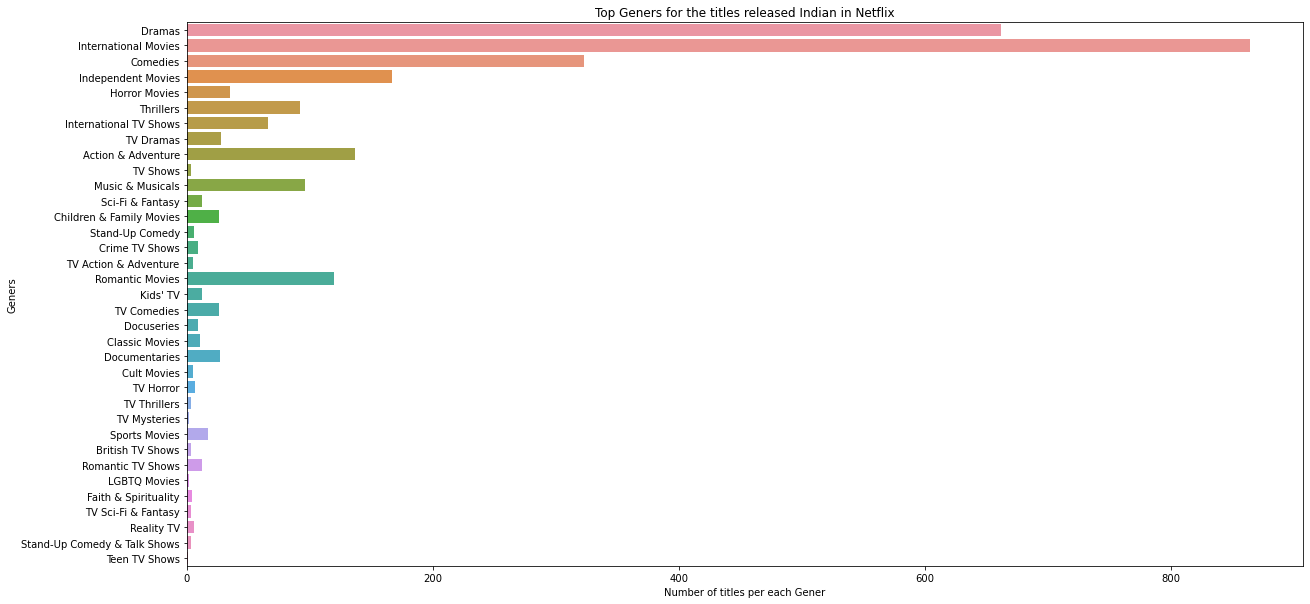

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_India, y='listed_in' )
plt.ylabel('Geners')
plt.xlabel('Number of titles per each Gener')
plt.title("Top Geners for the titles released Indian in Netflix")
plt.show()

## In INDIA , more titles released in netflix  are from genre i.e. "International Movies"

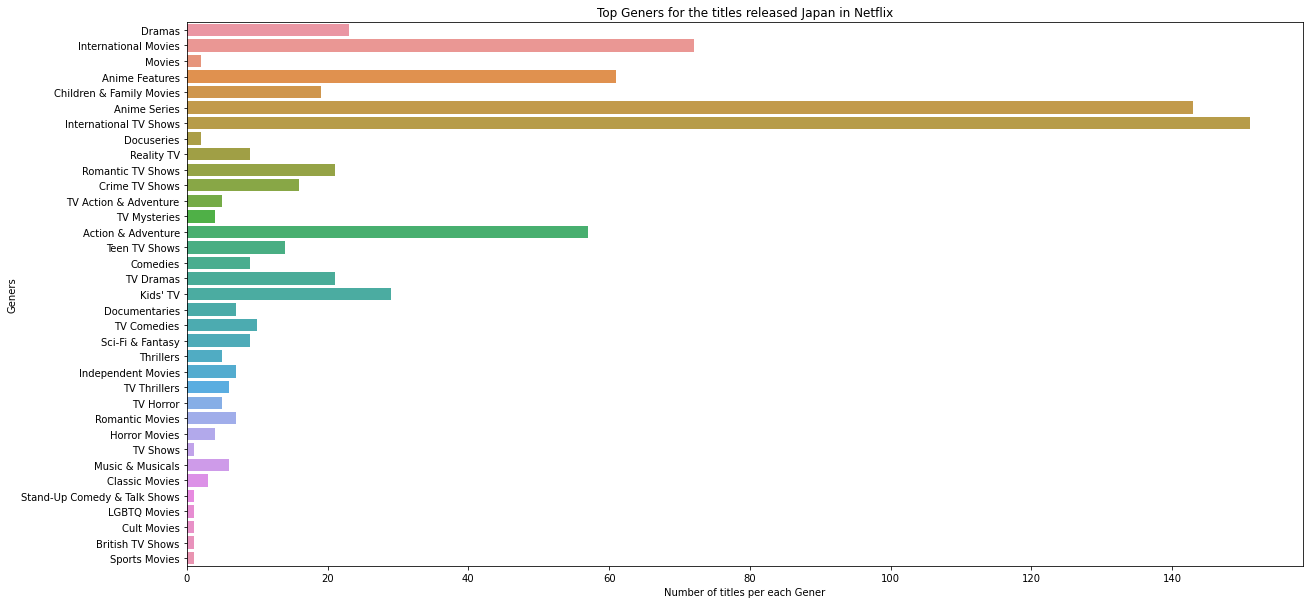

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_japan, y='listed_in' )
plt.ylabel('Geners')
plt.xlabel('Number of titles per each Gener')
plt.title("Top Geners for the titles released Japan in Netflix")
plt.show()

## In Japan , more titles released in netflix  are from genre i.e. "International TV shows" , followed by 'Anime Features'

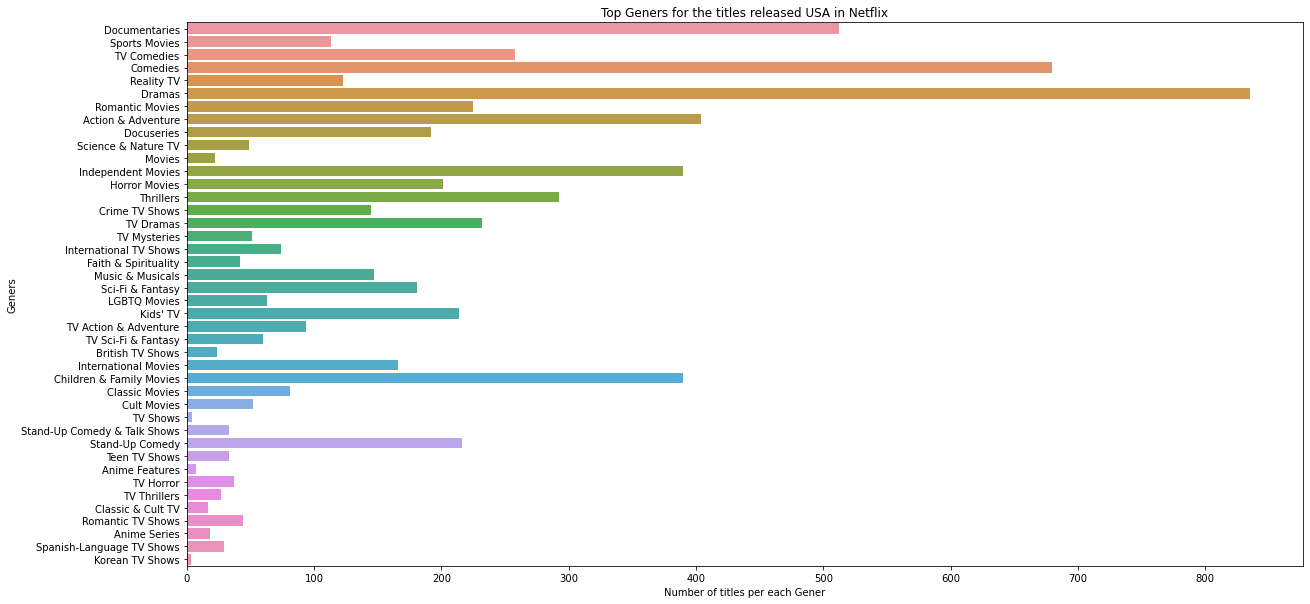

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_US, y='listed_in' )
plt.ylabel('Geners')
plt.xlabel('Number of titles per each Gener')
plt.title("Top Geners for the titles released USA in Netflix")
plt.show()

## In USA , more titles released in netflix  are from genre i.e. "Dramas"

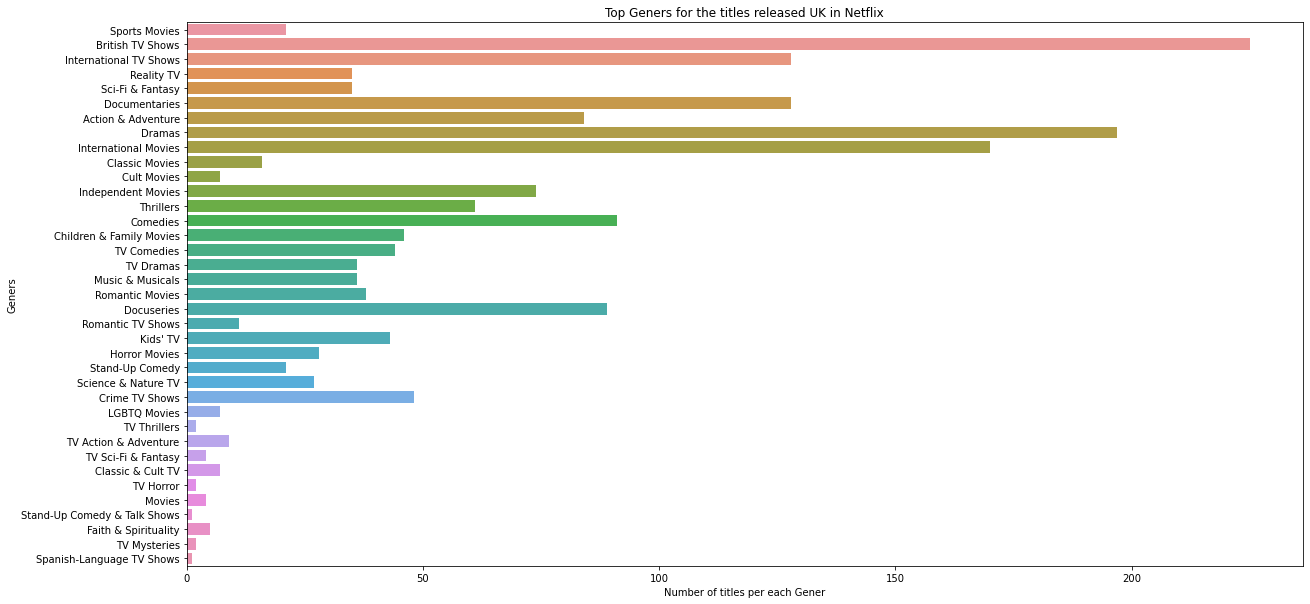

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_UK, y='listed_in' )
plt.ylabel('Geners')
plt.xlabel('Number of titles per each Gener')
plt.title("Top Geners for the titles released UK in Netflix")
plt.show()

## In UK , more titles released in netflix  are from genre i.e. "British TV shows"

# Lets analyse the director vs genre for the top directors

In [ ]:
temp555 = pd.DataFrame(df[df['director']!='unavailable'].groupby(by=['director','title','listed_in']).size()).reset_index()

In [ ]:
temp_Rajiv_Chilaka = temp555[temp555['director']=='Rajiv Chilaka']
temp_Steven_Spielberg = temp555[temp555['director']=='Steven Spielberg']
temp_Martin_Scorsese = temp555[temp555['director']=='Martin Scorsese']
temp_Jan_Suter = temp555[temp555['director']=='Jan Suter']

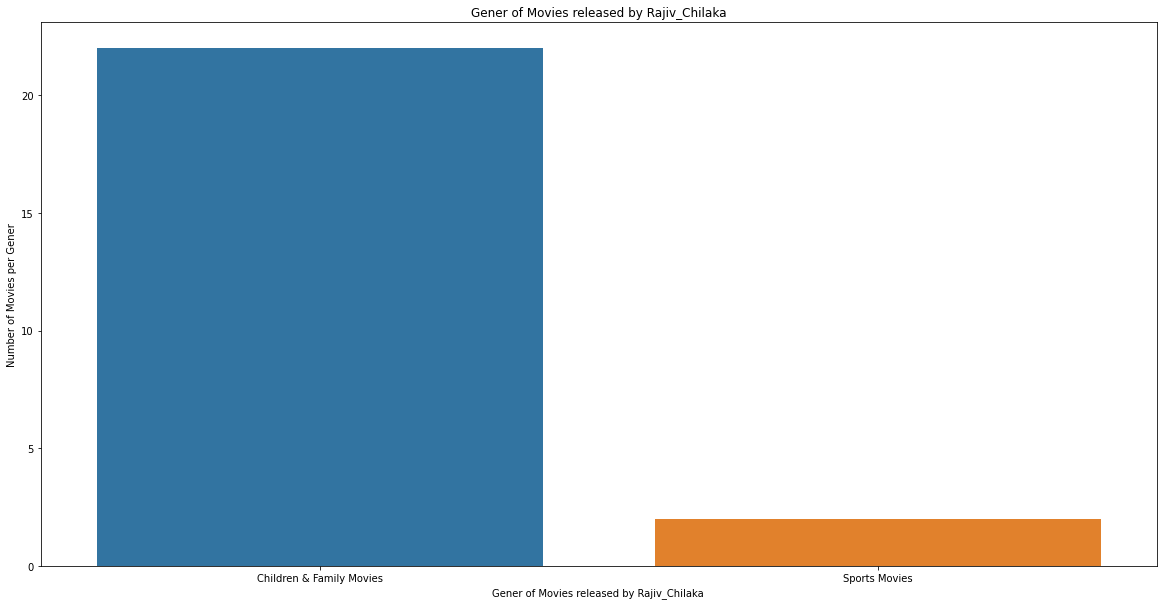

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Rajiv_Chilaka,  x='listed_in' )
plt.ylabel('Number of Movies per Gener')
plt.xlabel('Gener of Movies released by Rajiv_Chilaka ')
plt.title('Gener of Movies released by Rajiv_Chilaka')
plt.show()

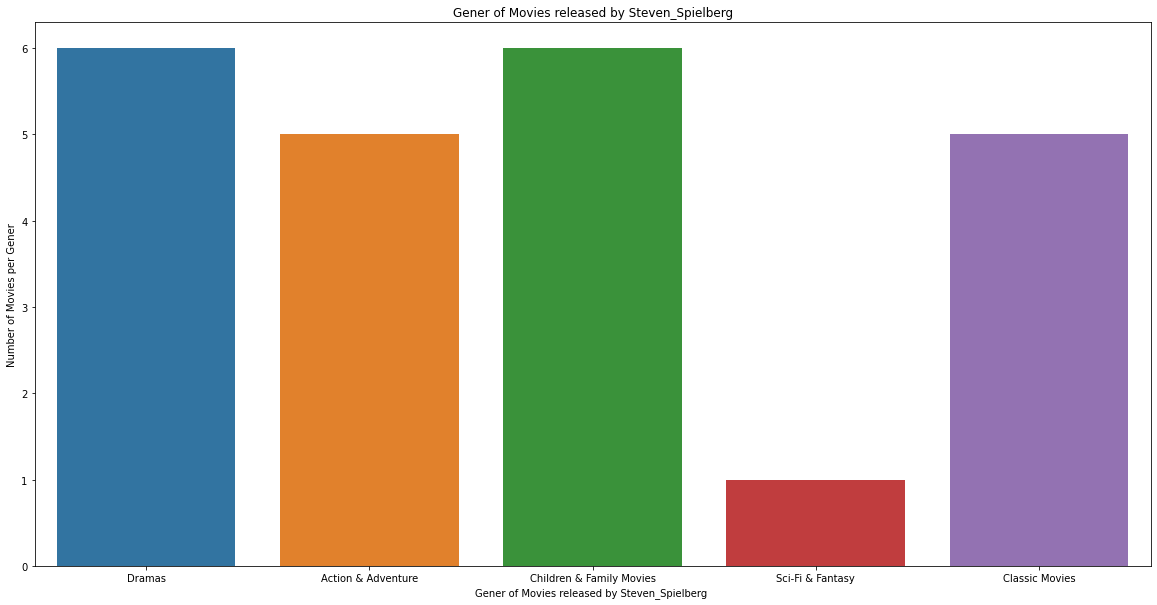

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Steven_Spielberg,  x='listed_in' )
plt.ylabel('Number of Movies per Gener')
plt.xlabel('Gener of Movies released by Steven_Spielberg ')
plt.title('Gener of Movies released by Steven_Spielberg')
plt.show()

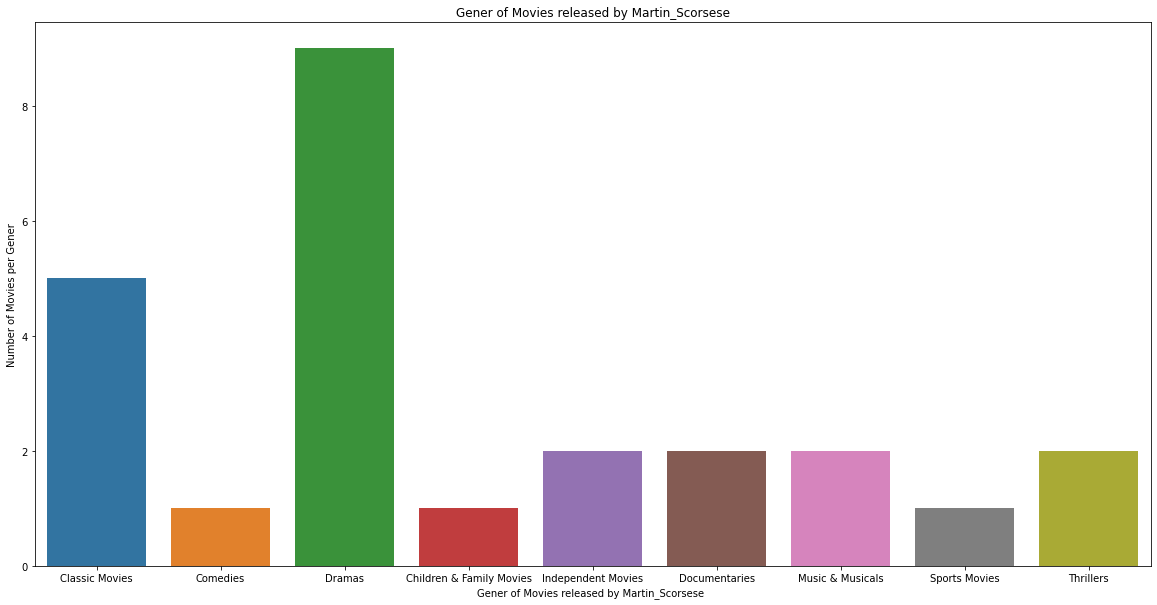

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Martin_Scorsese,  x='listed_in' )
plt.ylabel('Number of Movies per Gener')
plt.xlabel('Gener of Movies released by Martin_Scorsese ')
plt.title('Gener of Movies released by Martin_Scorsese')
plt.show()

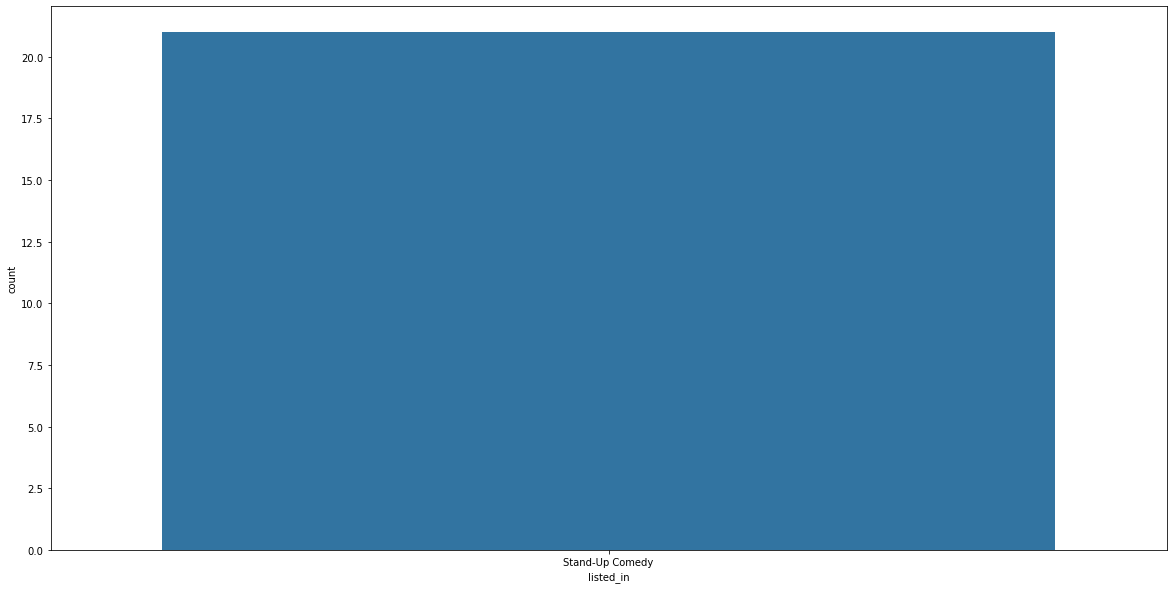

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Jan_Suter,  x='listed_in' )
plt.show()

## lets Analyse top actors in netflix titles

In [ ]:
temp666 = pd.DataFrame(df[df['cast']!='unavailable'].groupby(by=['cast','title','listed_in']).size()).reset_index()

In [ ]:
top_10_actors = pd.DataFrame(temp666['cast'].value_counts()[:11]).reset_index()

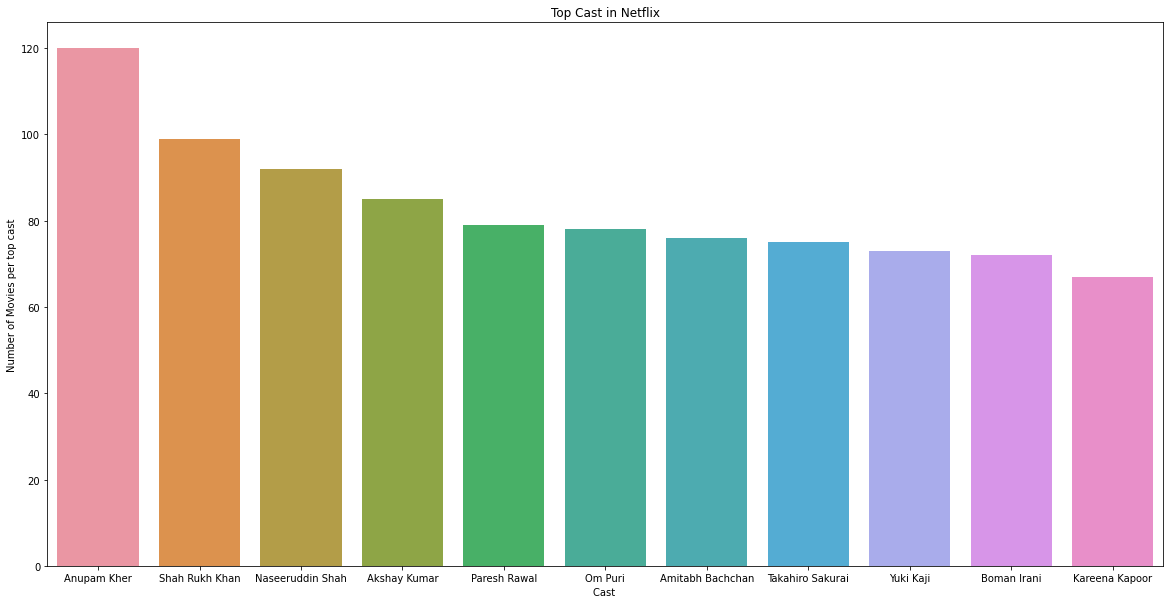

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=top_10_actors , x = 'index' , y='cast')
plt.ylabel('Number of Movies per top cast')
plt.xlabel('Cast ')
plt.title('Top Cast in Netflix')
plt.show()

## Anupam Kher is the most popular actor in the titles relased in Netflix

## Lets Analyse the Genre vs top 5 actors

In [ ]:
temp_Anupam_Kher= temp666[temp666['cast']=='Anupam Kher']
temp_Shah_Rukh_Khan = temp666[temp666['cast']=='Shah Rukh Khan']
temp_Naseeruddin_Shah = temp666[temp666['cast']=='Naseeruddin Shah']
temp_Akshay_Kumar = temp666[temp666['cast']=='Akshay Kumar']
temp_Paresh_Rawal = temp666[temp666['cast']=='Paresh Rawal']

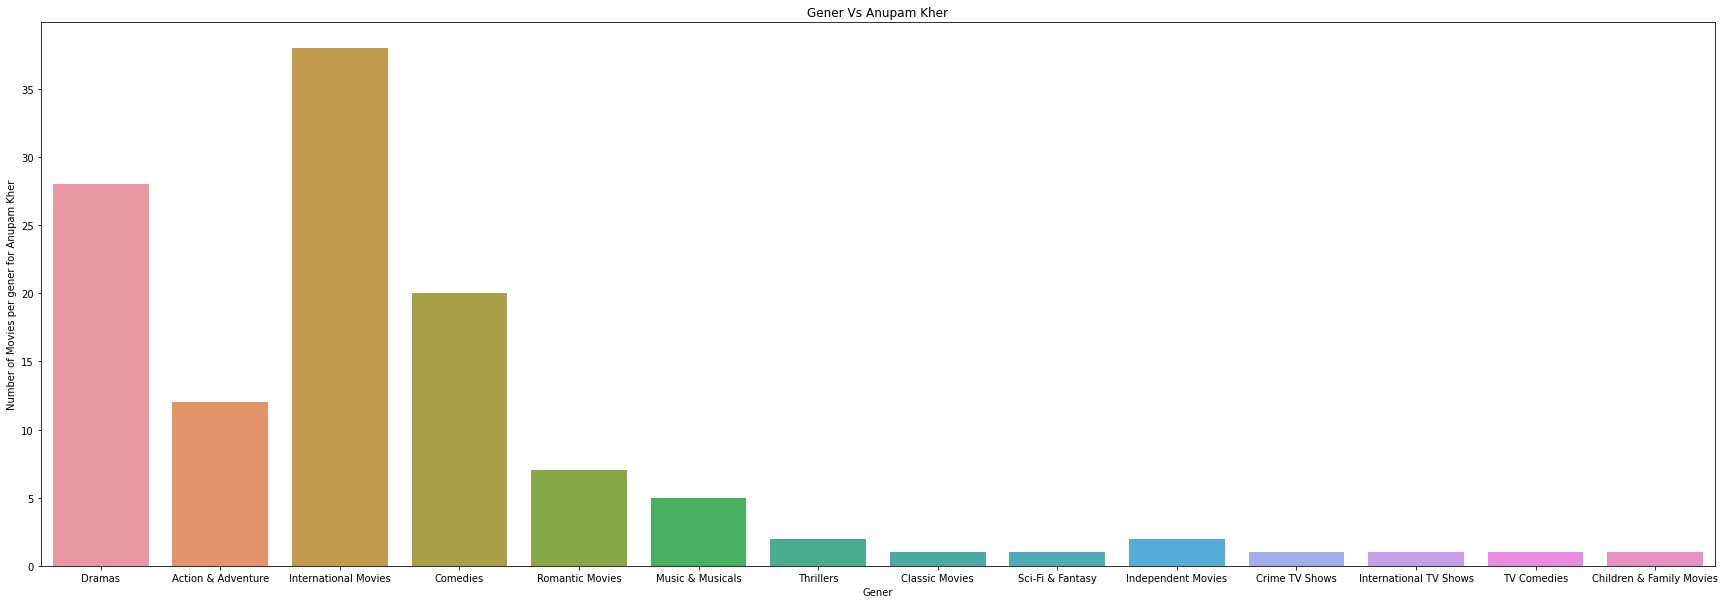

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=temp_Anupam_Kher,  x='listed_in' )
plt.ylabel('Number of Movies per gener for Anupam Kher')
plt.xlabel('Gener')
plt.title('Gener Vs Anupam Kher')
plt.show()

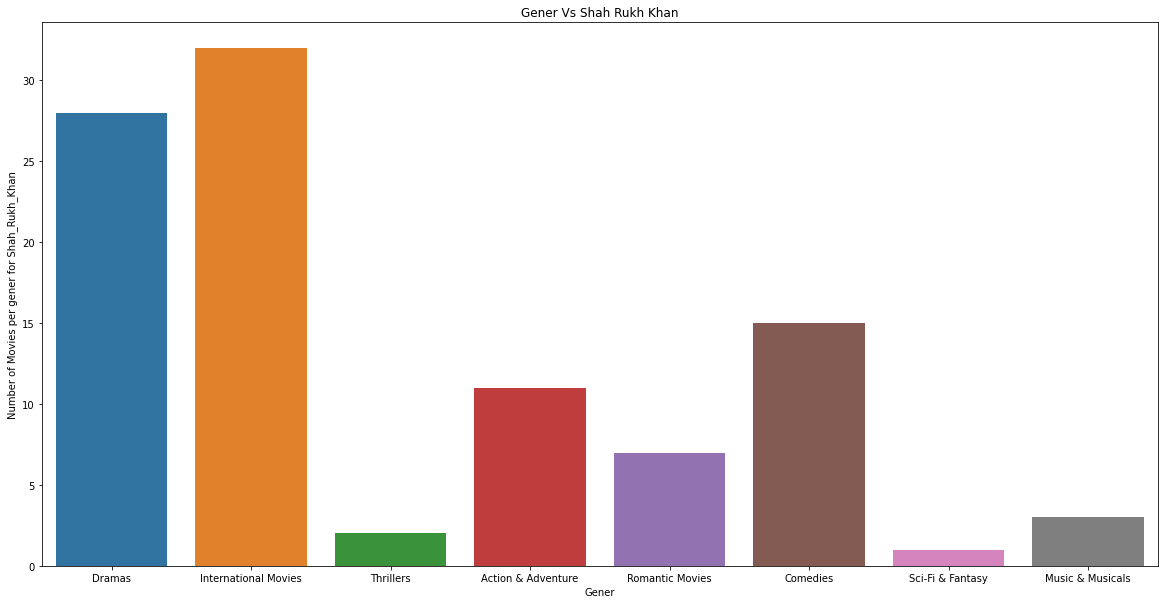

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Shah_Rukh_Khan ,   x='listed_in' )
plt.ylabel('Number of Movies per gener for Shah_Rukh_Khan')
plt.xlabel('Gener')
plt.title('Gener Vs Shah Rukh Khan')
plt.show()

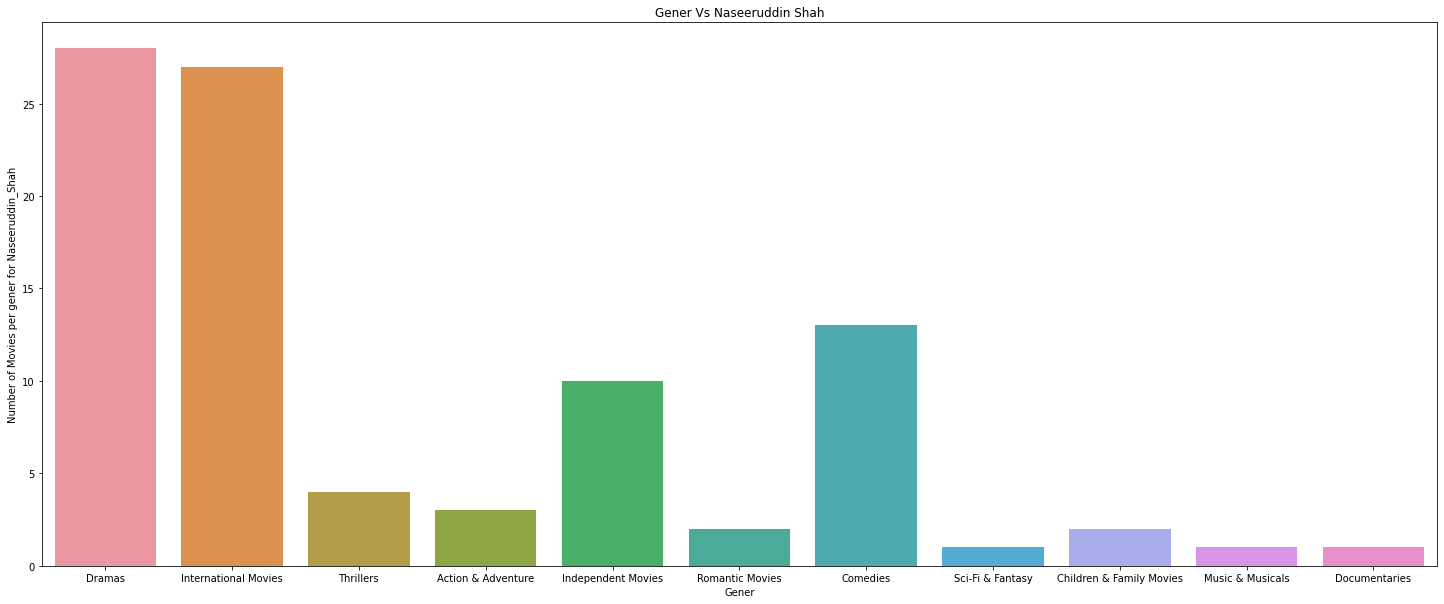

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data=temp_Naseeruddin_Shah ,   x='listed_in' )
plt.ylabel('Number of Movies per gener for Naseeruddin_Shah')
plt.xlabel('Gener')
plt.title('Gener Vs Naseeruddin Shah')
plt.show()

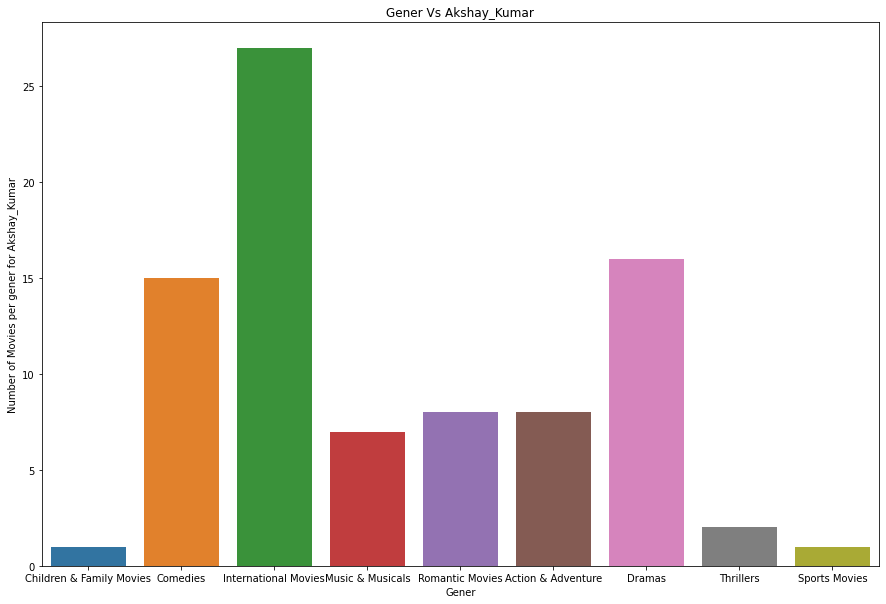

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=temp_Akshay_Kumar ,   x='listed_in' )
plt.ylabel('Number of Movies per gener for Akshay_Kumar')
plt.xlabel('Gener')
plt.title('Gener Vs Akshay_Kumar')
plt.show()

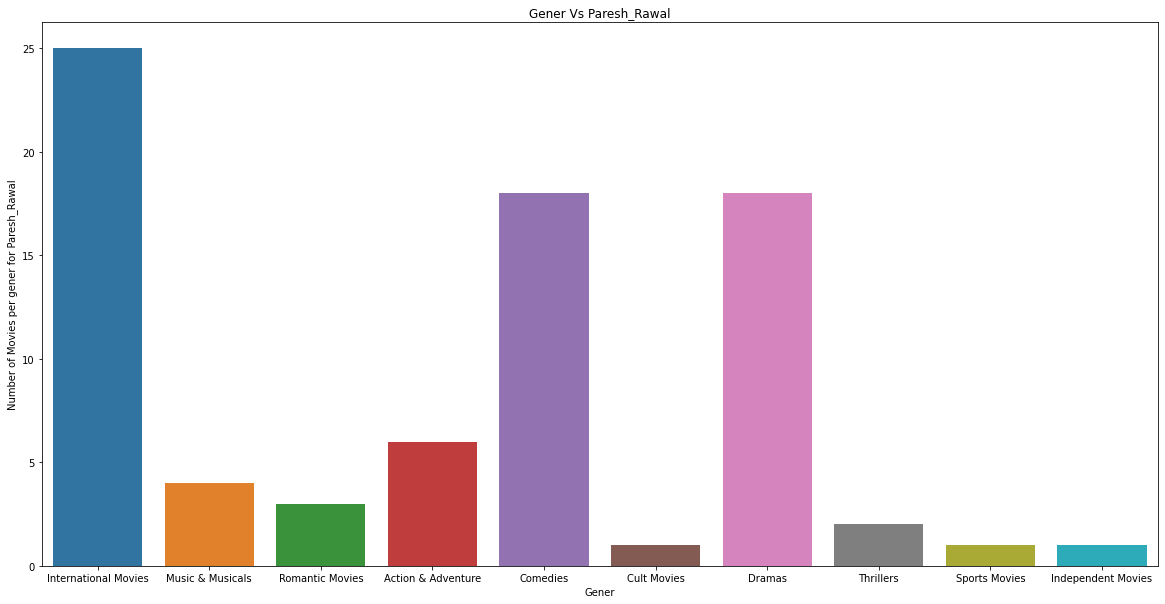

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=temp_Paresh_Rawal ,   x='listed_in' )
plt.ylabel('Number of Movies per gener for Paresh_Rawal')
plt.xlabel('Gener')
plt.title('Gener Vs Paresh_Rawal')
plt.show()

In [ ]:
df_movies = df[df['type']=='Movie']

In [ ]:
data_duration = df_movies.groupby(['title','duration','listed_in']).sum().reset_index().sort_values(by='duration',ascending=False)

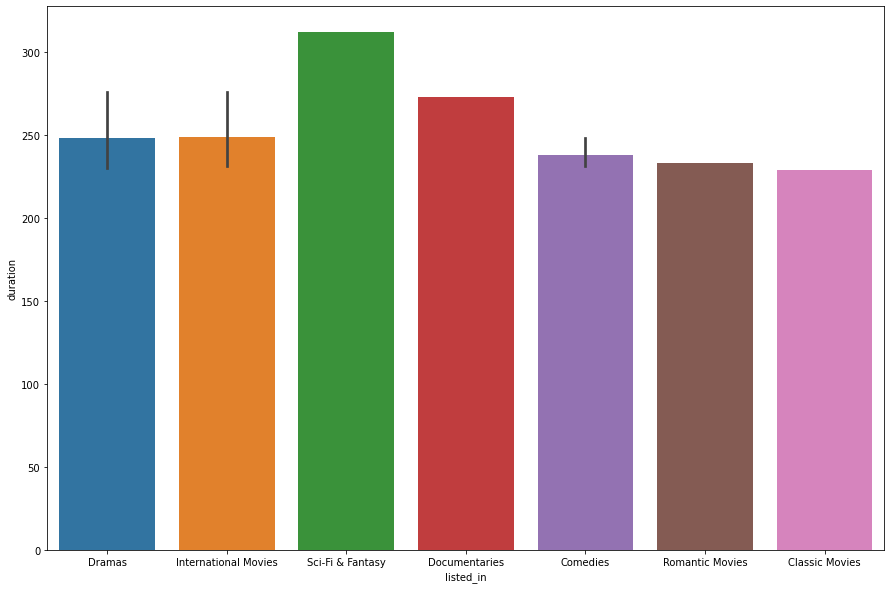

In [ ]:
plt.figure(figsize=(15,10))
top_duration = data_duration[:20]
sns.barplot(data=top_duration , x='listed_in',y='duration')
plt.show()

In [ ]:
temp_rating_movies = df_movies.groupby(by=['rating','title'])
temp_rating_shows = df_tvshows.groupby(by=['rating','title'])


In [ ]:
temp_rating_movies = temp_rating_movies.size().reset_index()
temp_rating_shows = temp_rating_shows.size().reset_index()


In [ ]:
rating_movies = pd.DataFrame(temp_rating_movies.value_counts(subset='rating')).reset_index()[:10]
rating_tvshows = pd.DataFrame(temp_rating_shows.value_counts(subset='rating')).reset_index()[:10]

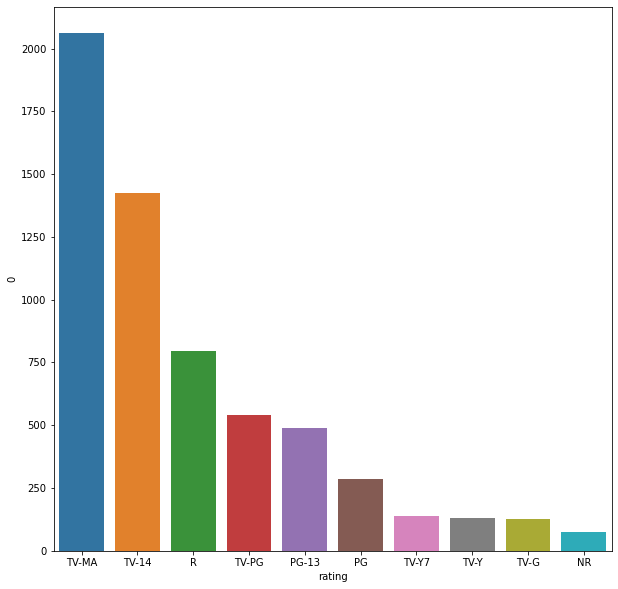

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=rating_movies , x='rating' , y=0 )
plt.show()

# Most Movies in netflix has rating of TV_MA

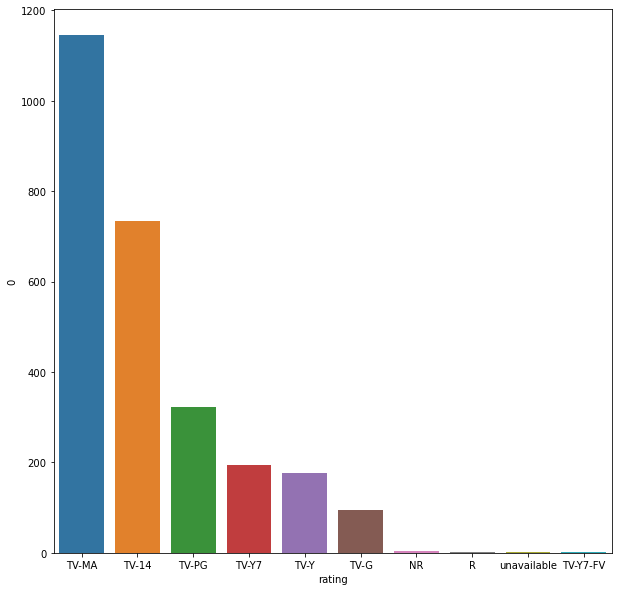

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=rating_tvshows , x='rating' , y=0 )
plt.show()

# Most TV_shows has rating of TV_MA

# duration analysis

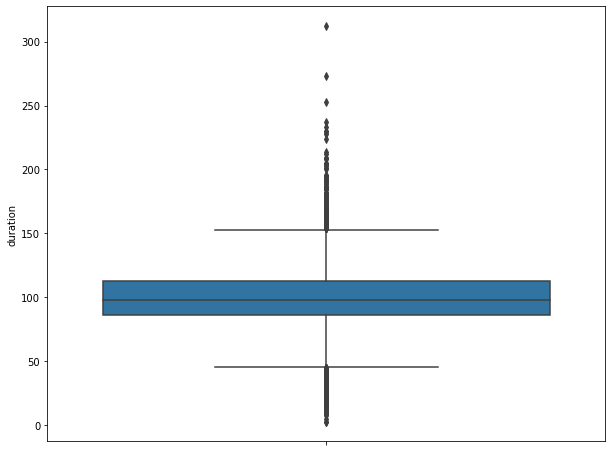

In [ ]:
duration_movies = df_movies.groupby(by=['duration','title','director']).size().reset_index()
plt.figure(figsize=(10,8))
sns.boxplot(data= duration_movies , y=duration_movies['duration'])
plt.show()

# Average Duration of the movies in Netflix is around 98 minutes
## most of the movies in Netflix has duration between 75 minutes to 125 minutes

In [ ]:
duration_movies[duration_movies['duration'] > 300]

,duration,title,director,0
6852,312,Black Mirror: Bandersnatch,unavailable,15


## the longest Movie in Netflix is 312 mintues  and the title is Black Mirror: Bandersnatch

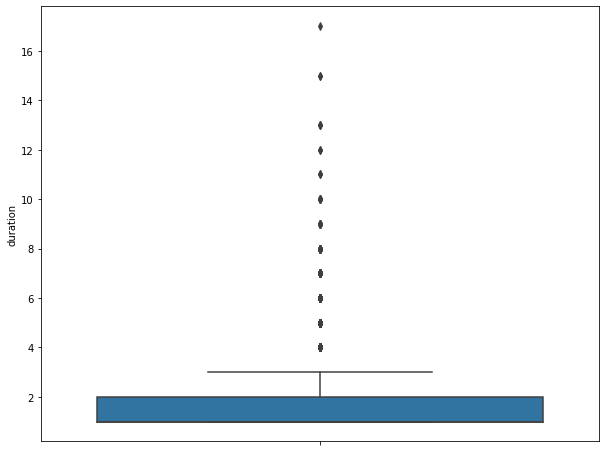

In [ ]:
duration_tvshows = df_tvshows.groupby(by=['duration','title','director']).size().reset_index()
plt.figure(figsize=(10,8))
sns.boxplot(data= duration_tvshows , y=duration_tvshows['duration'])
plt.show()

# Average Duration of Most of the TV shows in Netflix is between 1 to 2 seasons


In [ ]:
duration_tvshows[duration_tvshows['duration'] > 16]

,duration,title,director,0
2757,17,Grey's Anatomy,unavailable,30


# the longest season in Netflix has 17 season and the title is Grey's Anatomy

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


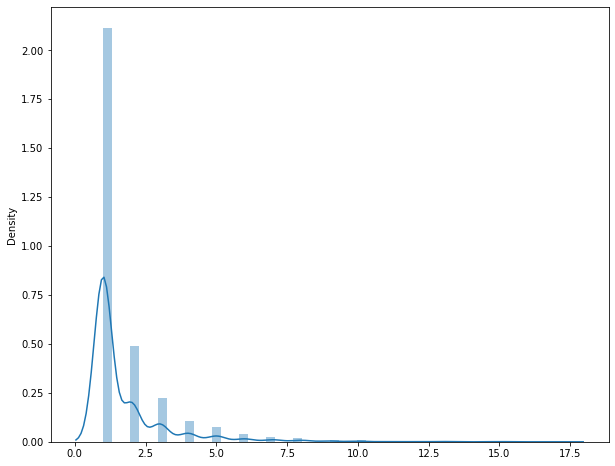

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot( x=duration_tvshows['duration'])
plt.show()

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


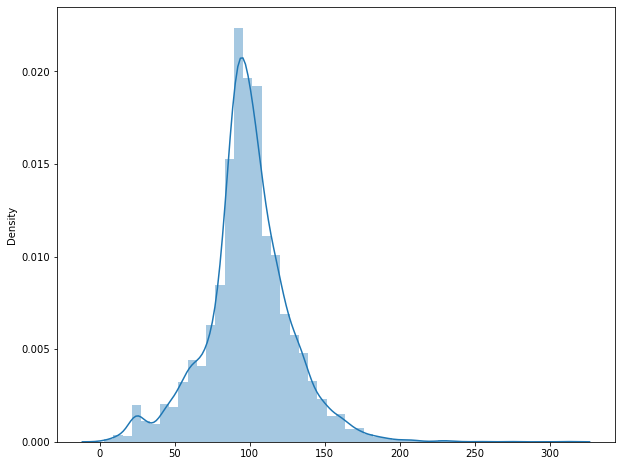

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(x=duration_movies['duration'])
plt.show()

In [ ]:
corr=df.corr()

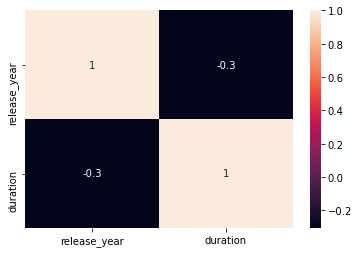

In [ ]:
plt.figure()
sns.heatmap(data=corr,annot=True)
plt.show()

**Insights**:

Netflix has released more Movies than Tvshows

a. Over the last 30 years , from year 2012 Netflix has increased in the release of  number of movies and TV-shows has increased

b.  over past 2 years ,Netflix has more released more TV shows than Movies i.e., Netflix has more focus on TV Shows than movies in recent  years

Rajiv Chilaka is the most popular director with more titles in Netflix. The most popular genre of Rajiv Chilaka is Childern and Family Movies

United states released more titles in Netflix ,followed by India

In Decemeber and July more than 250 TV_shows released in Netflix

Netflix has released more number of titles from the genre of 'International Movies' , followed by Drama Genre

In INDIA , more titles released in netflix  are from genre i.e. "International Movies"

In Japan , more titles released in netflix  are from genre i.e. "International TV shows" , followed by 'Anime Features'

In USA , more titles released in netflix  are from genre i.e. "Dramas"

In UK , more titles released in netflix  are from genre i.e. "British TV shows"

Anupam Kher is the most popular actor in the titles relased in Netflix

Most Movies in netflix has rating of TV_MA

Most TV_shows has rating of TV_MA

Average Duration of the movies in Netflix is around 98 minutes .

most of the movies in Netflix has duration between 75 minutes to 125 minutes

The longest Movie in Netflix is 312 mintues  and the title is Black Mirror: Bandersnatch

Average Duration of Most of the TV shows in Netflix is between 1 to 2 seasons

the longest season in Netflix has 17 season and the title is Grey's Anatomy


**Recommendation:**

As in the recent years , Netflix is releasing more Tvshows than Movies.So now, Netflix should start increase in  releasing movies than Tvshows

Netflix should release more movies of Rajiv Chilaka, with genre of Childern and Family Movies

Netflix should also focus on releasing movies from countries other than India and USA , so that Netflix can grow in the all the countries

Best time to release TV shows either at the Decemeber or July

Netflix should release more titles from Gener 'International Movies'

In India,Netflix should release more titles from Gener 'International Movies'

In Japan,Netflix should release more titles from Gener 'International TV Shows' and 'Anime Features'

In USA,Netflix should release more titles from Gener "Dramas"

In UK,Netflix should release more titles from Gener "British TV shows"

Netflix should release more titles with Anupam Kher as Cast

In Netflix most of the movies has rating TV_MA , so the netflix should also focus on the other geners too, it migth help to get reach to more variety of audience for Netflix

In Netflix most of the TV-shows has rating TV_MA , so the netflix should also focus on the other geners too, it migth help to get reach to more variety of audience for Netflix

Netflix should release movies with average duration of 98 minutes.

Netflix should release TV_shows  with duration of around 2 seasons
